In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [68]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
df = dataset.drop(['CustomerID','Gender'], axis=1)

In [71]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [72]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [73]:
wcss = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_norm)
    wcss.append(km.inertia_)

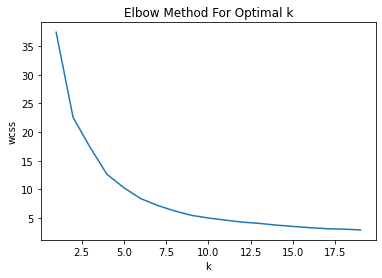

In [74]:
plt.plot(K, wcss)
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('Elbow Method For Optimal k')
plt.show()

In [75]:
clustering = KMeans(n_clusters=3)
prediction = clustering.fit_predict(df_norm)

In [76]:
df['Cluster'] = prediction
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,2
3,23,16,77,0
4,31,17,40,0


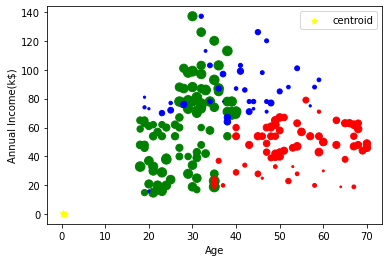

In [88]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
plt.scatter(df1.Age, df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green')
plt.scatter(df2.Age, df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3.Age, df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='blue')
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], color='yellow', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.legend()